# Use none linear regression model to forecast China' GDP in each year

In [13]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# To see plots in notebook, run the following command
%matplotlib inline

In [3]:
# read data from csv
df=pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


Text(0.5, 1.0, 'China GDP')

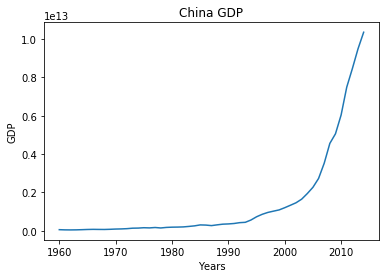

In [7]:
# plot the data
x=df['Year'].values
y=df['Value'].values
plt.plot(x,y)
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('China GDP')

In [8]:
# estimate a function to build the model
def f(x,b1,b2):
    y=1/(1+np.exp(-b1*(x-b2)))
    return y

# normalize the data first
x_norm=x/max(x)
y_norm=y/max(y)

# use curve_fit to find the best parameters
popt,pcov=curve_fit(f,x_norm,y_norm)
print('the parameters are: ',popt)

the parameters are:  [690.451711     0.99720713]


Text(0, 0.5, 'GDP')

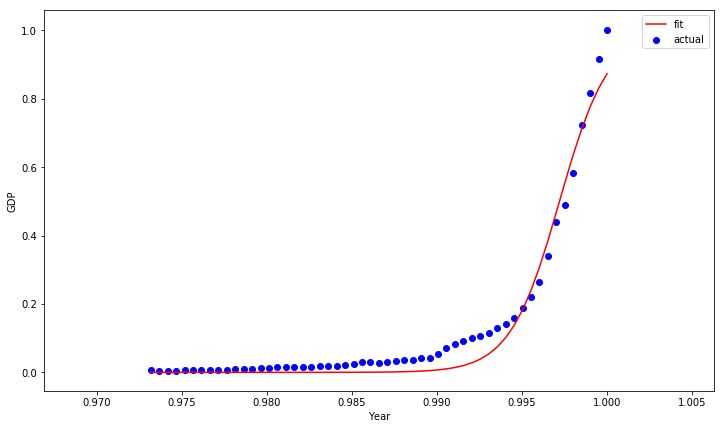

In [9]:
# use the parameters to forecast the result
plt.figure(figsize=(12,7))
plt.scatter(x_norm,y_norm,label='actual',color='b')
y_p=f(x_norm,*popt)
plt.plot(x_norm,y_p,label='fit',color='r')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')